In [2]:
import keras
import tensorflow as tf 
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split

from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import os
from imblearn.over_sampling import SMOTE
from PIL import Image 
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
df=pd.read_csv('feature_df5.csv')
df


,Unnamed: 0,filename,ID,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0,/home/bharath/Documents/minor_project/Coswara-...,0Rlzhiz6bybk77wdLjxwy7yLDhg1,0.487363,0.027569,2470.967412,2517.814026,5379.424805,0.203021,-462.127197,...,-1.103547,-0.880837,-7.490606,-1.588393,-3.186440,-2.744413,-2.226262,-3.944690,-0.808605,Negative
1,1,/home/bharath/Documents/minor_project/Coswara-...,0zexHIcM7tQDdnFiEj2Eb0v3g212,0.547617,0.107162,1940.498072,1813.820437,3693.147479,0.215175,-324.389374,...,-8.520887,-6.950836,-6.598480,-4.847742,-5.417847,-6.834573,-3.456784,-6.699997,-3.686547,Negative
2,2,/home/bharath/Documents/minor_project/Coswara-...,1AuoEhB8vAfCtxTFFV0W916yBqA3,0.514773,0.017643,2579.095729,2179.958408,5152.092575,0.214020,-476.986115,...,-2.425081,2.609728,-6.330436,-3.861457,-8.274412,-1.362872,-1.068926,-3.095093,-5.271952,Negative
3,3,/home/bharath/Documents/minor_project/Coswara-...,1ctsxp37dWNbCbizTioZzpAWqJx2,0.450089,0.071343,3155.851489,2493.776313,5913.285925,0.223205,-300.117065,...,-1.413210,-3.646290,-10.951367,-2.503790,-3.314369,-13.047846,-4.500897,-9.916449,-2.619344,Negative
4,4,/home/bharath/Documents/minor_project/Coswara-...,2TkAK2YVkYS7Ux3hAPBUgYgg9DI3,0.408882,0.033162,2690.356522,1928.754665,4653.493423,0.251088,-456.970795,...,-8.608671,1.258676,-5.317297,1.863027,-2.633213,3.165513,-6.824652,0.384505,-1.032386,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635,1635,/home/bharath/Documents/minor_project/Coswara-...,poQ11Wmw16VIjjkc6dAPeAWzf962,0.433225,0.076216,2221.983003,1921.750911,4468.890807,0.179044,-363.145935,...,-11.172530,-3.374198,-5.004271,-4.099576,-0.226029,-6.339697,-0.883040,-3.747492,-5.963787,Positive
1636,1636,/home/bharath/Documents/minor_project/Coswara-...,t0IcY0l4PcU8VicMlC1xC3taL2E2,0.480486,0.038903,2200.016577,2011.394737,4242.583519,0.141155,-351.391724,...,-6.916527,-7.300231,-9.792745,-11.759289,-5.760458,-7.454152,-7.579600,-5.794465,-3.166620,Positive
1637,1637,/home/bharath/Documents/minor_project/Coswara-...,wNyhOMMuX3Yo8ntJrq4zGjnpcXk2,0.251965,0.020257,1299.377036,1098.850044,2388.576744,0.102642,-473.469238,...,-4.254105,-9.239409,-9.212125,-0.390240,-6.198088,-6.797496,-0.304594,-0.291965,-7.052453,Negative
1638,1638,/home/bharath/Documents/minor_project/Coswara-...,wV7x1QU1gFOwMAyp8ZnHNcAsntv2,0.435976,0.086391,2908.059790,2065.660246,5301.453703,0.299982,-279.686646,...,-12.590389,3.034466,-0.021595,4.900113,-3.080751,-3.302820,-15.081415,-3.815409,-7.292781,Negative


In [7]:
path_wav="/home/bharath/Documents/minor_project/spectrograms/"
fols=os.listdir(path_wav)
fols.sort()
fols
df1=df.set_index('ID')
df2=df1.sort_index()
df2['spec_path']=fols
df2

,Unnamed: 0,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label,spec_path
ID,,,,,,,,,,,,,,,,,,,,,
00xKcQMmcAhX8CODgBBLOe7Dm0T2,1386,/home/bharath/Documents/minor_project/Coswara-...,0.486930,0.016896,1697.681855,1757.577940,3240.350567,0.148045,-478.514618,70.100082,...,0.048531,4.837788,3.275086,-0.791220,-3.778592,-4.239213,-4.500542,-6.313851,Positive,00xKcQMmcAhX8CODgBBLOe7Dm0T2.png
01OCEf1yB4czsq8ygRoT51s96Ba2,1122,/home/bharath/Documents/minor_project/Coswara-...,0.557700,0.044455,2067.380396,2172.015593,4090.107858,0.197551,-418.463867,56.635921,...,-4.704960,-2.309303,-1.280276,-4.588282,-4.615841,-1.293004,-5.739768,-2.127026,Negative,01OCEf1yB4czsq8ygRoT51s96Ba2.png
05acPS4aRGfvuOfku11Za8zve8i2,1123,/home/bharath/Documents/minor_project/Coswara-...,0.329387,0.016205,2455.761699,1863.700219,4580.370703,0.182262,-471.215393,39.070118,...,5.805582,7.336322,14.992475,-9.123658,-0.671804,-8.687099,-7.871926,-9.469444,Positive,05acPS4aRGfvuOfku11Za8zve8i2.png
05bieNLXPuaIWEVaX81EkbbjVrh1,1046,/home/bharath/Documents/minor_project/Coswara-...,0.342719,0.053678,2314.380956,1800.121597,4282.851562,0.170773,-397.143524,43.372704,...,3.583166,-9.292901,-3.638335,-4.370253,-7.681143,-6.318760,-0.865582,-0.511508,Negative,05bieNLXPuaIWEVaX81EkbbjVrh1.png
0B1rE91KabdId1lUmWJB7NLg8OP2,1517,/home/bharath/Documents/minor_project/Coswara-...,0.396464,0.013160,1651.719036,1652.887455,3013.276224,0.099656,-470.377960,79.650276,...,-9.026066,-8.759172,-4.287939,-8.831211,-4.346251,-4.993454,-5.174449,-3.862005,Negative,0B1rE91KabdId1lUmWJB7NLg8OP2.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zt2ssuTmZESDhYPW40dyo5RW2sT2,543,/home/bharath/Documents/minor_project/Coswara-...,0.430113,0.008673,1977.797332,1914.038599,3760.380308,0.268917,-582.130554,56.513111,...,-0.410231,-8.720358,-4.350749,-3.632388,-2.418300,-2.608852,-3.687799,-4.718729,Negative,zt2ssuTmZESDhYPW40dyo5RW2sT2.png
zw0pYfsZxDShQGV2HTuont8wU8V2,1121,/home/bharath/Documents/minor_project/Coswara-...,0.460522,0.097584,2662.707466,2673.532937,5768.119960,0.165901,-315.762543,40.771191,...,-1.533139,-5.611181,-11.185686,-4.881123,-7.040242,-4.598104,-4.873704,-2.267522,Negative,zw0pYfsZxDShQGV2HTuont8wU8V2.png
zxRJaPEBRGX8uH4egnctWAuIuy32,386,/home/bharath/Documents/minor_project/Coswara-...,0.418397,0.053253,2953.573584,1858.464531,4840.933228,0.260627,-402.779724,37.040295,...,-0.505075,-7.667482,-1.462302,-6.817224,2.639014,-9.983527,-8.350154,-1.400714,Negative,zxRJaPEBRGX8uH4egnctWAuIuy32.png


In [8]:
columns = df2.columns.tolist()
columns_1 = [c for c in columns if c not in ["label"]]
target = "label"
X = df2[columns_1]
y = df2[target]

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3,train_size=0.7,random_state=0)

In [9]:
train_path="/home/bharath/Documents/minor_project/train_spec/"
val_path="/home/bharath/Documents/minor_project/val_spec/"

    

In [18]:
for i in range(len(X_train['spec_path'])):
    im1=Image.open("/home/bharath/Documents/minor_project/spectrograms/"+X_train['spec_path'][i])
    if(y_train[i]=='Negative'):
        im1.save(train_path+'negative/'+X_train['spec_path'][i])
    else:
         im1.save(train_path+'positive/'+X_train['spec_path'][i])
         
    


In [20]:
for j in range(len(X_val['spec_path'])):
    im2=Image.open("/home/bharath/Documents/minor_project/spectrograms/"+X_val['spec_path'][j])
    if(y_val[j]=='Negative'):
        im2.save(val_path+'negative/'+X_val['spec_path'][j])
    else:
        im2.save(val_path+'positive/'+X_val['spec_path'][j])



In [10]:
img_width, img_height = 288, 432
epochs = 100 
batch_size = 32

#input shape for the model layer 0
input_shape = (img_width, img_height, 3)
datagen = ImageDataGenerator(
                             shear_range = 0.2, 
                             zoom_range = 0.1, 
                             horizontal_flip=False, 
                             fill_mode = 'nearest')
K.image_data_format()


'channels_last'

In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#first hidden layer 
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#second hidden layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#output layer
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 286, 430, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 286, 430, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 143, 215, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 141, 213, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 141, 213, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 70, 106, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 68, 104, 64)       1

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [14]:
train_gen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.05, horizontal_flip=False)

test_gen = ImageDataGenerator(rescale=1./255)

In [17]:
train_generator = train_gen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_gen.flow_from_directory(
    val_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')


Found 1148 images belonging to 2 classes.
Found 492 images belonging to 2 classes.


In [28]:
model_conv = model.fit(train_generator,
                        steps_per_epoch=1148 // batch_size,
                        epochs=epochs,
                        validation_data=validation_generator,
                        validation_steps=492 // batch_size)

Epoch 1/100
35/35 [==============================] - 122s 3s/step - loss: 1.0416 - accuracy: 0.7794 - val_loss: 0.3327 - val_accuracy: 0.8813
Epoch 2/100
35/35 [==============================] - 107s 3s/step - loss: 0.3869 - accuracy: 0.8884 - val_loss: 0.3187 - val_accuracy: 0.8854
Epoch 3/100
35/35 [==============================] - 108s 3s/step - loss: 0.2849 - accuracy: 0.8881 - val_loss: 0.2652 - val_accuracy: 0.8896
Epoch 4/100
35/35 [==============================] - 108s 3s/step - loss: 0.3026 - accuracy: 0.8801 - val_loss: 0.2505 - val_accuracy: 0.8896
Epoch 5/100
35/35 [==============================] - 109s 3s/step - loss: 0.2522 - accuracy: 0.8933 - val_loss: 0.2496 - val_accuracy: 0.8854
Epoch 6/100
35/35 [==============================] - 107s 3s/step - loss: 0.2922 - accuracy: 0.8776 - val_loss: 0.2480 - val_accuracy: 0.8854
Epoch 7/100
35/35 [==============================] - 107s 3s/step - loss: 0.2965 - accuracy: 0.8886 - val_loss: 0.2428 - val_accuracy: 0.8854
Epoch 

In [33]:
score=model.evaluate(validation_generator)


16/16 [==============================] - 10s 608ms/step - loss: 0.2462 - accuracy: 0.8841


In [34]:
def plot_metrics(model_conv):
    range_list = list(range(epochs))
    for idx, m in enumerate(model_conv.history.keys()):
        plt.figure(figsize=(20,5), dpi=180)
        plt.plot(range_list, model_conv.history[m])
        plt.title(f"{m.upper()} for {epochs} Epochs using convnet")
        plt.xlabel("Epochs")
        plt.ylabel(f"{m.upper()}")
        plt.savefig(f"./img/Fig{idx+7}_{m.upper()}_ConvNet")

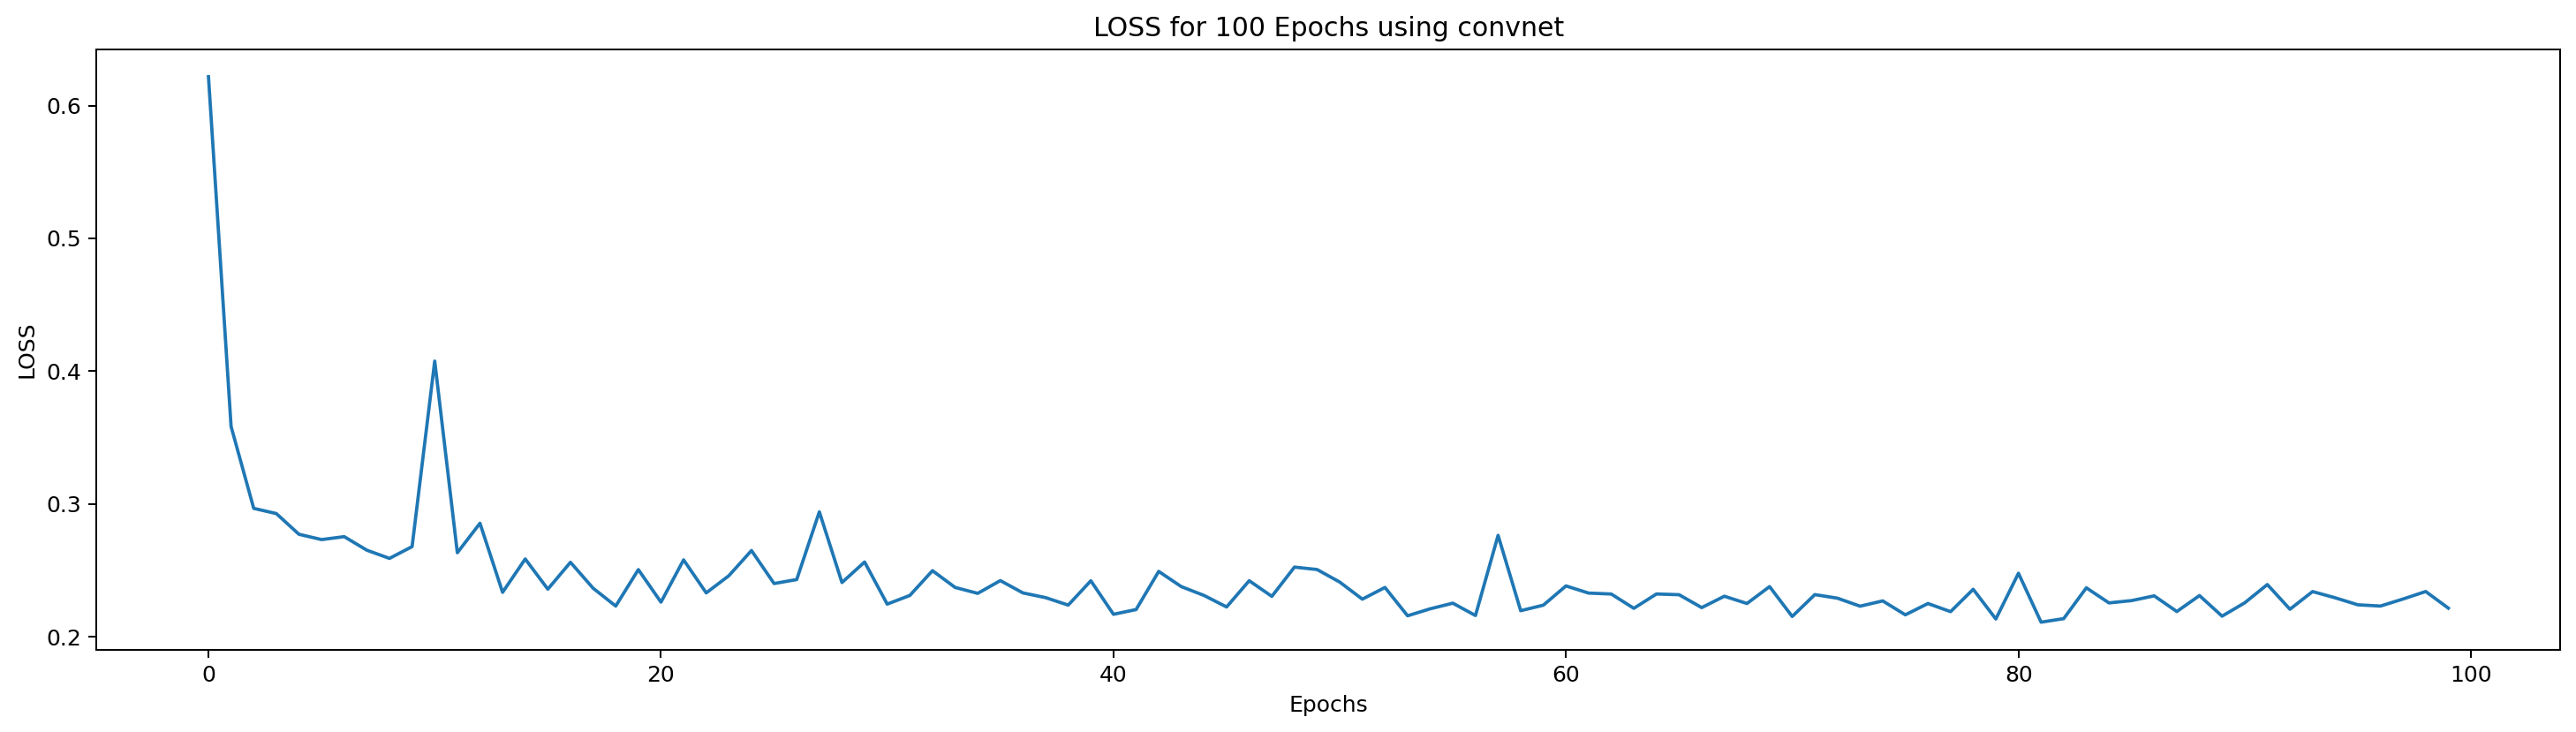

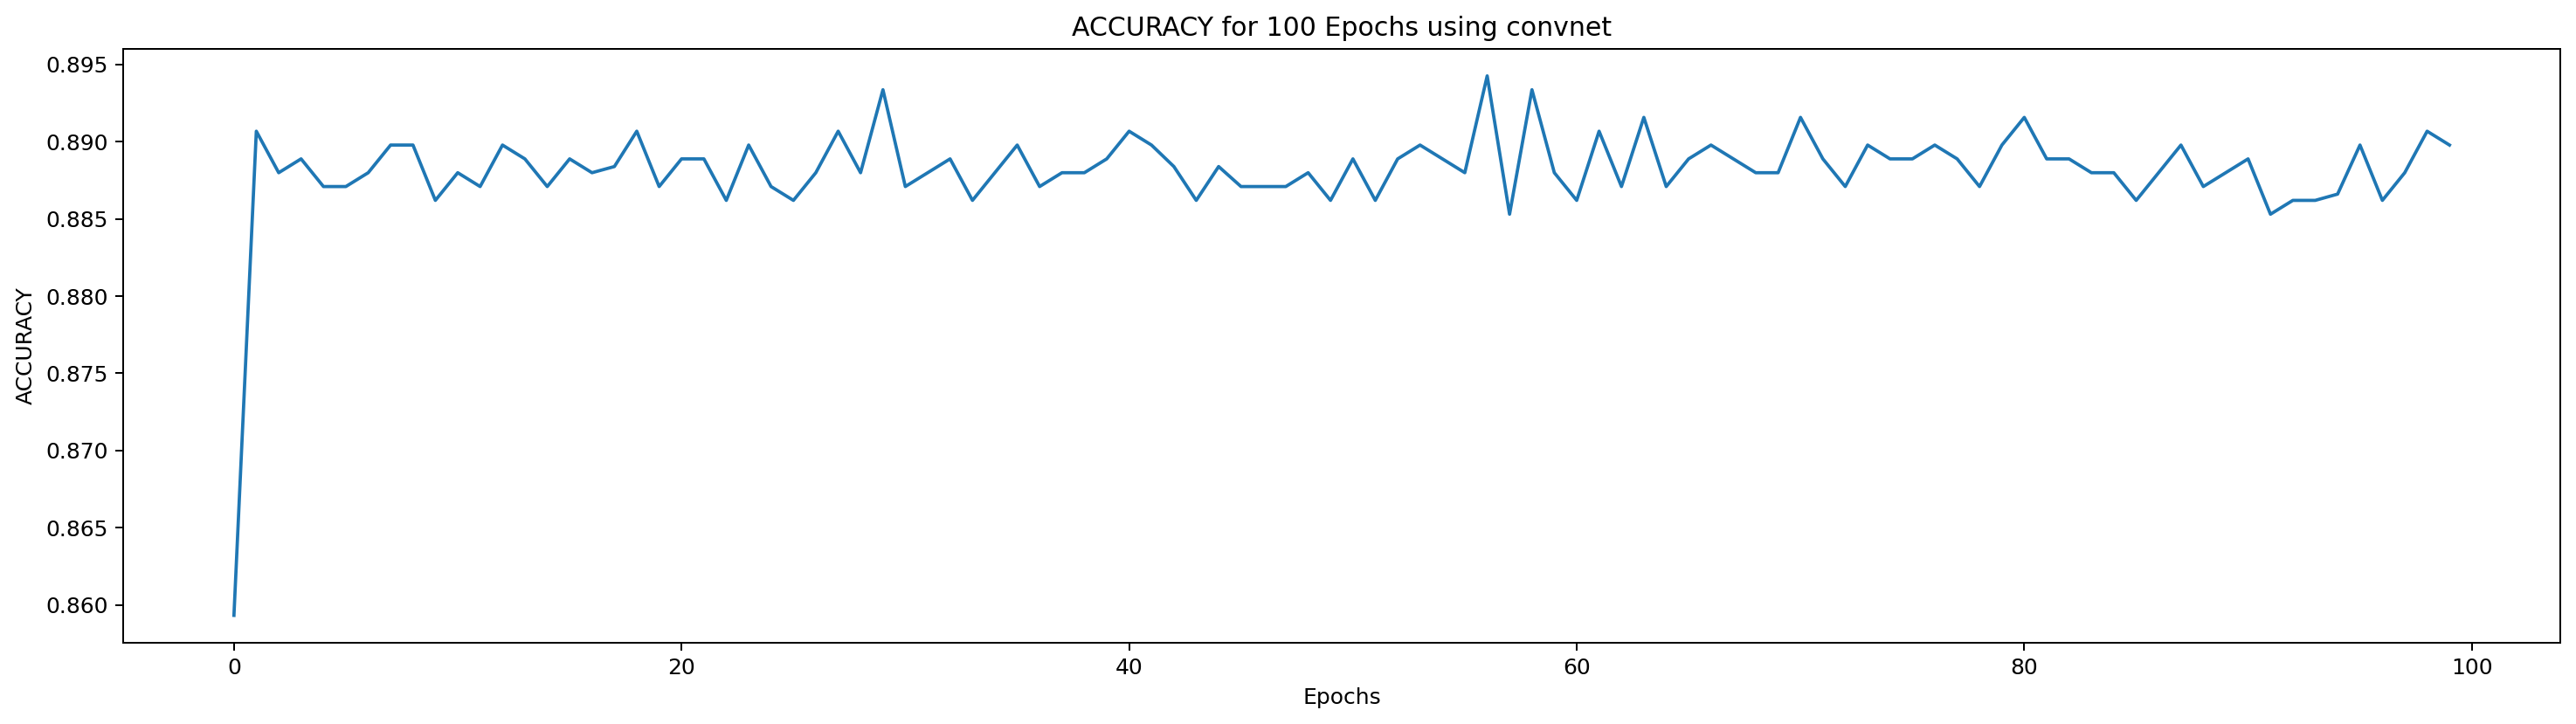

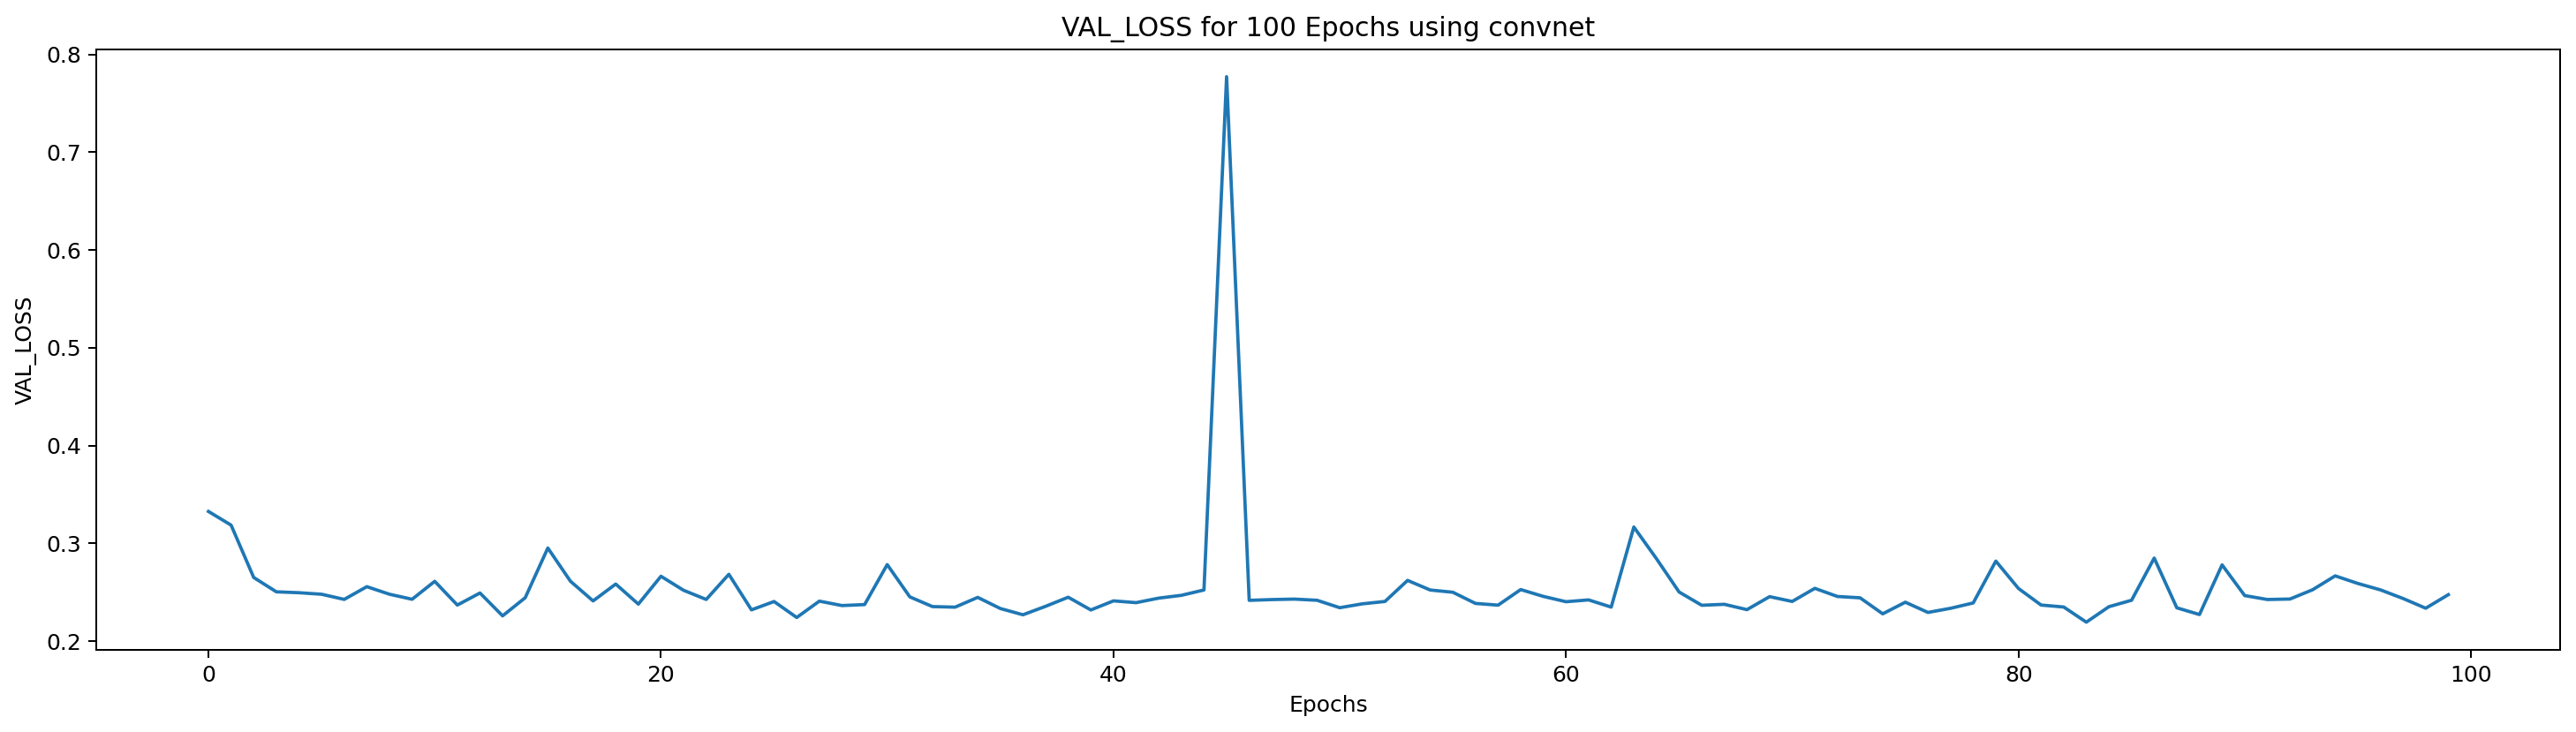

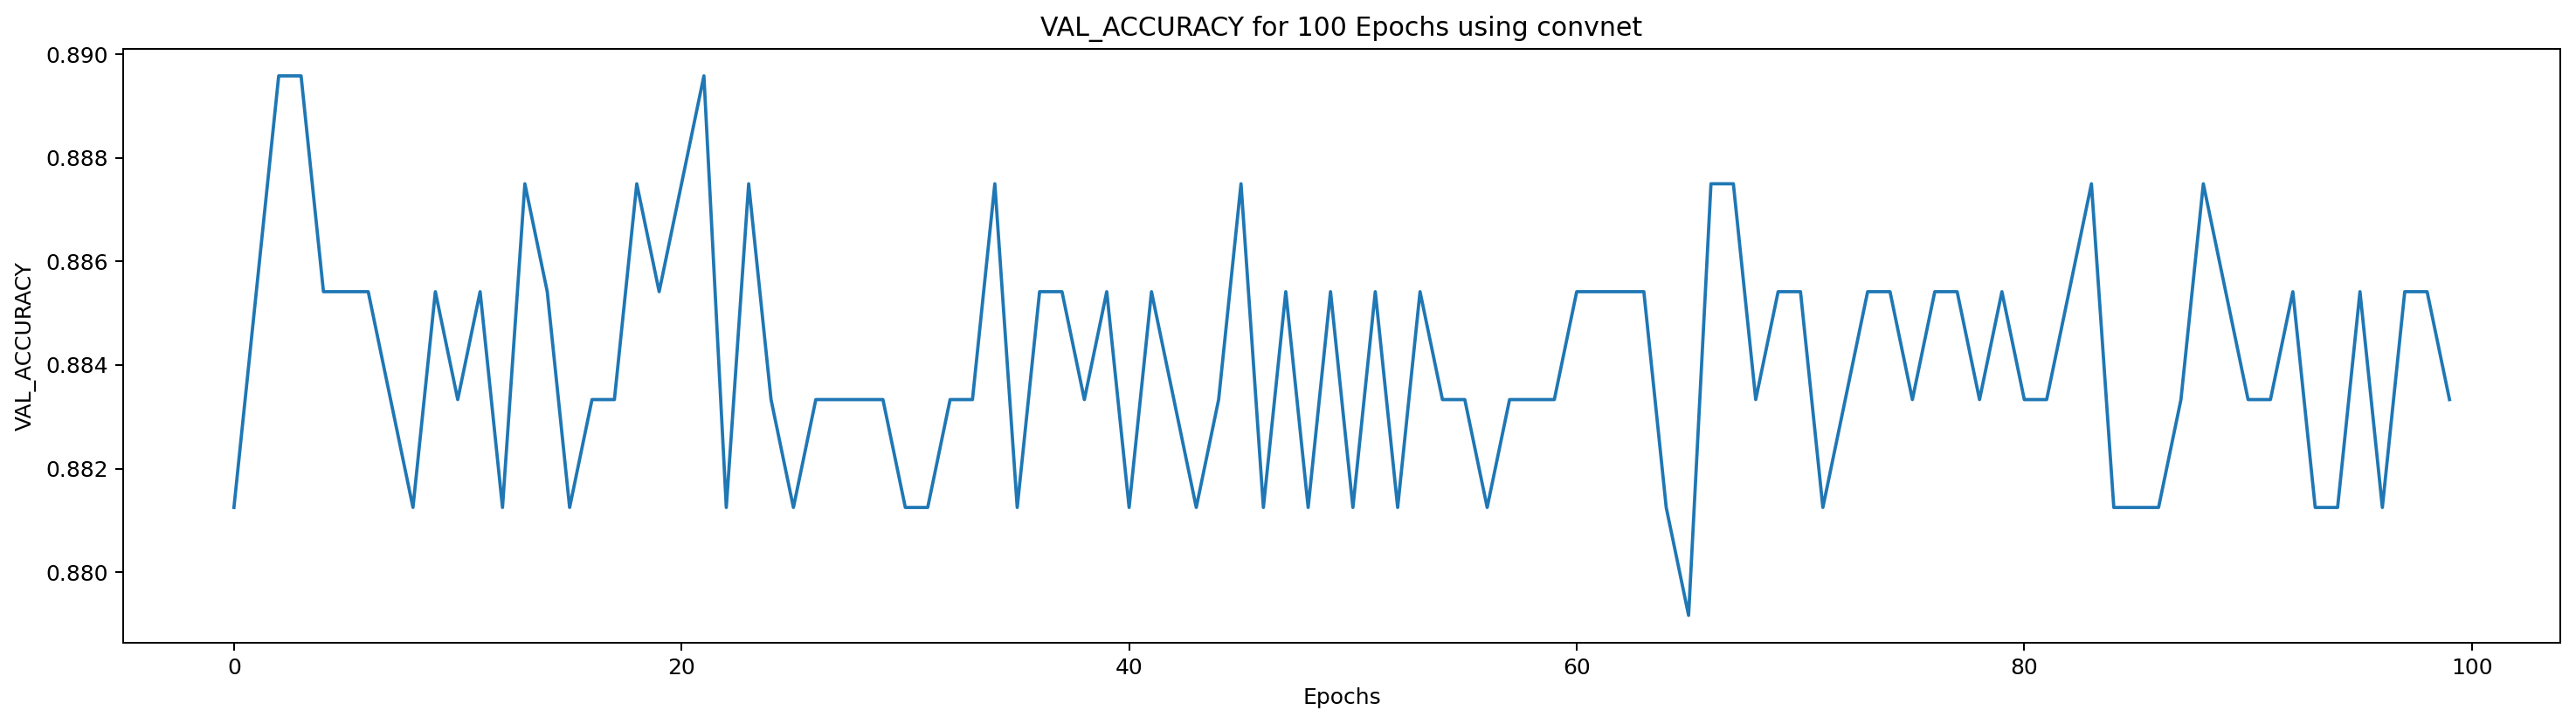

In [35]:
plot_metrics(model_conv)

In [51]:
Y_pred = model.predict(validation_generator, 492 // 
batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
cm=confusion_matrix(validation_generator.classes,y_pred)

def plot_confusion_matrix(cm):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    classNames = ['Negative','Positive']
    plt.title('COVID-19 Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.savefig("./img/Fig6_Confusion_Matrix_50_epochs.png")
    plt.show()

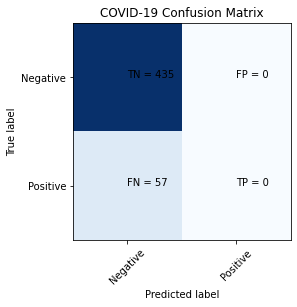

In [52]:
 plot_confusion_matrix(cm)

In [54]:
target_names = ['Negative', 'Positive']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.88      1.00      0.94       435
    Positive       0.00      0.00      0.00        57

    accuracy                           0.88       492
   macro avg       0.44      0.50      0.47       492
weighted avg       0.78      0.88      0.83       492



/home/bharath/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bharath/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bharath/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
